In [ ]:
# Memo 
# Radar needs in log, < 1 doesn't work well
# SRCL is strange


In [ ]:
quit()

In [2]:
import pykat
from pykat import finesse
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline
pykat.init_pykat_plotting(dpi=90)

# Base Model
## Base model is only with amplitude detectors, no photo detectors

In [3]:
import utils_DRFPMI as utl

base = utl.model_DRFPMI()

# Field Check (POP, TMSX)

# SRC tuning

<function matplotlib.pyplot.show(*args, **kw)>

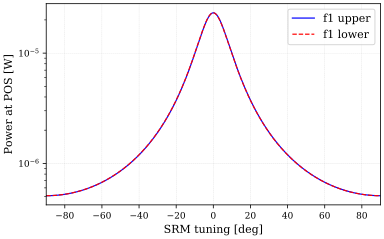

In [3]:
model, out = utl.run_sweep('SRCL', base)

plt.figure(1)
#plt.semilogy(out.x, out["CR_POS"]**2,label="Carrier") # CR => 0
plt.semilogy(out.x, out["SB1p_POS"]**2,label="f1 upper")
plt.semilogy(out.x, out["SB1m_POS"]**2,label="f1 lower",LineStyle='--')
#plt.semilogy(out.x, out["SB2p_POS"]**2,label="f2 upper")
#plt.semilogy(out.x, out["SB2m_POS"]**2,label="f2 lower",LineStyle='--')
plt.xlabel("SRM tuning [deg]")
plt.ylabel("Power at POS [W]")
plt.legend(loc=1)
plt.show

## Frequency Responses

### CARM
CARM has a pole.

<function matplotlib.pyplot.show(*args, **kw)>

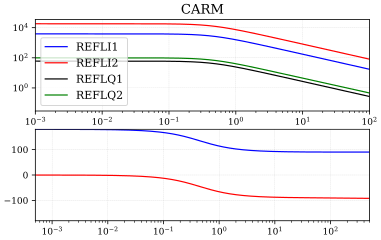

In [4]:
model,out = utl.run_fsig('CARM',base)

plt.subplot(2,1,1)
plt.loglog(out.x, np.abs(out["REFLI1"]),label="REFLI1")
plt.loglog(out.x, np.abs(out["REFLI2"]),label="REFLI2")
plt.loglog(out.x, np.abs(out["REFLQ1"]),label="REFLQ1")
plt.loglog(out.x, np.abs(out["REFLQ2"]),label="REFLQ2")
plt.xlim(0.001,100)
plt.title('CARM')
plt.legend()

plt.subplot(2,1,2)
plt.semilogx(out.x, np.angle(out["REFLI1"])*180/np.pi,label="REFLI1")
plt.semilogx(out.x, np.angle(out["REFLI2"])*180/np.pi,label="REFLI2")
plt.ylim(-180,180)

plt.show

In [7]:
### Searching pole...

print('Gain at DC is')
print(np.abs(out["REFLI1"][0]))
print('Gain at pole should be')
print(np.abs(out["REFLI1"][0])/np.sqrt(2))

print(np.abs(out["REFLI1"][264]))
print('Pole is at')
print(out.x[264])

Gain at DC is
3892.77149555314
Gain at pole should be
2752.6051221153234
2778.4741019583
Pole is at
0.436515832240166


### DARM

<function matplotlib.pyplot.show(*args, **kw)>

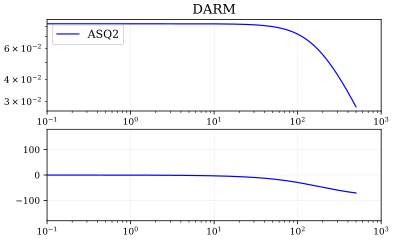

In [5]:
model, out_darm = utl.run_fsig('DARM', base)

plt.subplot(2,1,1)
plt.loglog(out_darm.x, np.abs(out_darm["ASQ2"]),label="ASQ2")
plt.xlim(0.1,1000)
plt.title('DARM')
plt.legend()

plt.subplot(2,1,2)
plt.semilogx(out_darm.x, np.angle(out_darm["ASQ2"])*180/np.pi,label="ASQ2")
plt.xlim(0.1,1000)
plt.ylim(-180,180)

plt.show

In [69]:
### Searching pole...

print('Gain at DC is')
print(np.abs(out_darm["ASQ2"][0]))
print('Gain at pole should be')
print(np.abs(out_darm["ASQ2"][0])/np.sqrt(2))

print(np.abs(out_darm["ASQ2"][651]))
print('Pole is at')
print(out_darm.x[651])

Gain at DC is
0.082916066053766
Gain at pole should be
0.05863051257592963
0.0584946602511422
Pole is at
179.887091512879


### PRCL

PRCL has a set of zero-pole. The pole frequency should be compared with the analytical prediction. 

<function matplotlib.pyplot.show(*args, **kw)>

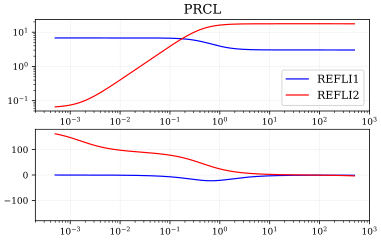

In [6]:
model, out_prcl = utl.run_fsig('PRCL',base)

plt.subplot(2,1,1)
plt.loglog(out_prcl.x, np.abs(out_prcl["REFLI1"]),label="REFLI1")
plt.loglog(out_prcl.x, np.abs(out_prcl["REFLI2"]),label="REFLI2")
plt.xlim(0.0002,1000)
plt.title('PRCL')
plt.legend()

plt.subplot(2,1,2)
plt.semilogx(out_prcl.x, np.angle(out_prcl["REFLI1"])*180/np.pi,label="REFLI1")
plt.semilogx(out_prcl.x, np.angle(out_prcl["REFLI2"])*180/np.pi,label="REFLI2")

plt.xlim(0.0002,1000)
plt.ylim(-180,180)

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

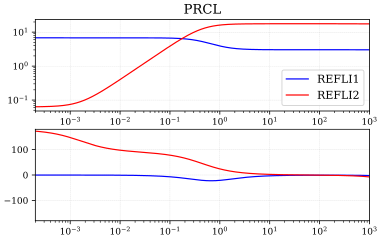

In [5]:
PRCL = base.deepcopy()
PRCL.parse("""
const fsb1 16.881M
const fsb2 45.0159M
fsig sig1 PRM 10 0
xaxis sig1 f log .0001 10000 5000

pd2 REFLI1 $fsb1 0 10 nREFL
pd2 REFLI2 $fsb2 0 10 nREFL

put REFLI1 f2 $x1
put REFLI2 f2 $x1

yaxis lin abs:deg
""")

out_prcl = PRCL.run()

plt.subplot(2,1,1)
plt.loglog(out_prcl.x, np.abs(out_prcl["REFLI1"]),label="REFLI1")
plt.loglog(out_prcl.x, np.abs(out_prcl["REFLI2"]),label="REFLI2")
plt.xlim(0.0002,1000)
plt.title('PRCL')
plt.legend()

plt.subplot(2,1,2)
plt.semilogx(out_prcl.x, np.angle(out_prcl["REFLI1"])*180/np.pi,label="REFLI1")
plt.semilogx(out_prcl.x, np.angle(out_prcl["REFLI2"])*180/np.pi,label="REFLI2")

plt.xlim(0.0002,1000)
plt.ylim(-180,180)

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

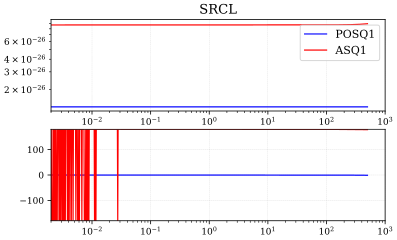

In [4]:
model,out_srcl = utl.run_fsig("SRCL", base)

plt.subplot(2,1,1)
plt.loglog(out_srcl.x, np.abs(out_srcl["POSQ1"]),label="POSQ1")
plt.loglog(out_srcl.x, np.abs(out_srcl["ASQ1"]),label="ASQ1")
plt.xlim(0.002,1000)
plt.title('SRCL')
plt.legend()

plt.subplot(2,1,2)
plt.semilogx(out_srcl.x, np.angle(out_srcl["POSQ1"])*180/np.pi,label="POSQ1")
plt.semilogx(out_srcl.x, np.angle(out_srcl["ASQ1"])*180/np.pi,label="ASQ1")

plt.xlim(0.002,1000)
plt.ylim(-180,180)

plt.show

In [28]:
### Searching pole...

print('Gain at DC is')
print(np.abs(out_prcl["REFLI1"][0]))
print('Gain at pole should be')
print(np.abs(out_prcl["REFLI1"][0])/np.sqrt(2))

print(np.abs(out_prcl["REFLI1"][510]))
print('Pole is at')
print(out_prcl.x[510])

Gain at DC is
6.82067100871652
Gain at pole should be
4.822942722505941
4.81576865638693
Pole is at
0.574076810748441


In [39]:
### Searching zero...

print('Gain at High freq is')
print(np.abs(out_prcl["REFLI1"][1000]))
print('Gain at zero should be')
print(np.abs(out_prcl["REFLI1"][1000])*np.sqrt(2))

print(np.abs(out_prcl["REFLI1"][532]))
print('Zero is at')
print(out_prcl.x[532])

Gain at High freq is
3.02993235250969
Gain at zero should be
4.284971425992222
4.28755331704262
Zero is at
0.777982815802537


In [212]:
### Searching pole...

print('Gain at High freq is')
print(np.abs(out_prcl["REFLI2"][5000]))
print('Gain at zero should be')
print(np.abs(out_prcl["REFLI2"][5000])/np.sqrt(2))

print(np.abs(out_prcl["REFLI2"][2220]))
print('Pole is at')
print(out_prcl.x[2220])

Gain at High freq is
15.6408368341119
Gain at zero should be
11.059741788832856
11.0654724934498
Pole is at
0.356451133426245


In [231]:
### Searching zero...

print('Gain at High freq is')
print(np.abs(out_prcl["REFLI2"][0]))
print('Gain at zero should be')
print(np.abs(out_prcl["REFLI2"][0])*np.sqrt(2))

print(np.abs(out_prcl["REFLI2"][750]))
print('Zero is at')
print(out_prcl.x[750])

Gain at High freq is
0.062988244409885
Gain at zero should be
0.08907882951453067
0.0890310484128153
Zero is at
0.00158489319246112


## Demod phase tuning

### Mthod1 (ex PRCL)

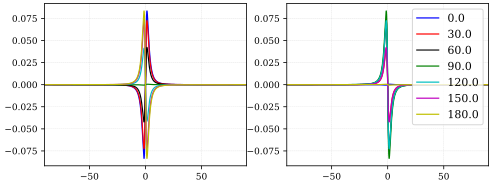

In [6]:
model = base.deepcopy()

model, out = utl.run_sweep('PRCL', model)

# Plot in different subplots
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,3))

for pp in np.linspace(0,180,7):
    model.REFLI1.phase1 = pp
    model.REFLQ1.phase1 = pp+90
    out = model.run()
    ax1.plot(out.x, out["REFLI1"],label=pp)
    ax2.plot(out.x, out["REFLQ1"],label=pp)

plt.legend(loc=1)
plt.show()




## Method 2 

DARM
AS2


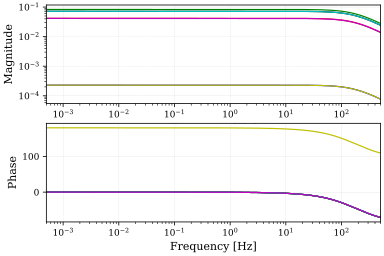

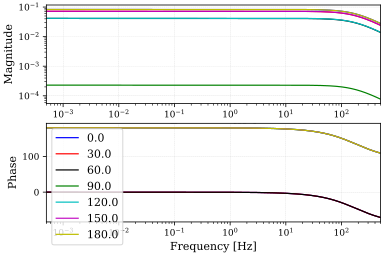

In [9]:
###### Run ######
DoF = "DARM"
sb = "2"
model,out = utl.run_fsig(DoF, base)
sens = "AS"
################
sensI = sens+"I"+sb
sensQ = sens+"Q"+sb

# Plot in different subplot
fig1, (ax1, ax2) = plt.subplots(2,1,figsize=(6,4))
fig2, (ax3, ax4) = plt.subplots(2,1,figsize=(6,4))

for pp in np.linspace(0,180,7):
    setI = "model."+sensI+".phase1 = pp"
    setQ = "model."+sensQ+".phase1 = pp+90"
    exec(setI)
    exec(setQ)
    out = model.run()
    ax1.loglog(out.x, np.abs(out[sensI]),label=pp)
    ax2.semilogx(out.x, np.angle(out[sensI])*180/np.pi,label=pp)
    ax3.loglog(out.x, np.abs(out[sensQ]),label=pp)
    ax4.semilogx(out.x, np.angle(out[sensQ])*180/np.pi,label=pp)

plt.legend()
ax1.set(xlabel='Frequency [Hz]', ylabel='Magnitude')
ax2.set(xlabel='Frequency [Hz]', ylabel='Phase')
ax3.set(xlabel='Frequency [Hz]', ylabel='Magnitude')
ax4.set(xlabel='Frequency [Hz]', ylabel='Phase')
print(DoF)
print(sens+sb)
plt.show()



In [3]:
###### Run ######
model,out = utl.run_fsig("DARM", base)
################

dummy, demod_REFL1 = utl.demod_phase(out,"REFL","1",0)
dummy, demod_POP1 = utl.demod_phase(out,'POP','1',0)
dummy, demod_POS1 = utl.demod_phase(out,'POS','1',0)
dummy, demod_AS1 = utl.demod_phase(out,'AS','1',0)

dummy, demod_REFL2 = utl.demod_phase(out,"REFL","2",0)
dummy, demod_POP2 = utl.demod_phase(out,'POP','2',0)
dummy, demod_POS2 = utl.demod_phase(out,'POS','2',0)
dummy, demod_AS2 = utl.demod_phase(out,'AS','2',0)

print(demod_REFL1)
print(demod_POP1)
print(demod_POS1)
print(demod_AS1)

print(demod_REFL2)
print(demod_POP2)
print(demod_POS2)
print(demod_AS2)



89.79210125216409
-29.025771217609254
-29.058255404884825
89.76390840018325
-89.23288975481483
11.786744206910194
12.983960862424274
89.84129417399141


# Seinging Matrix
## Radar plots (my favorite...)

## Radar practice

## Multiple plot practice

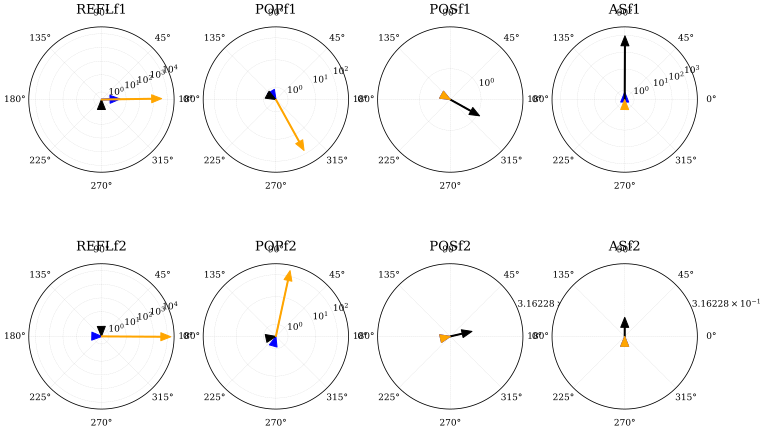

In [170]:
###### Computing the signal and plot ##########

# Specify subplot configuration
# This case is 2x4

ax = plt.subplots(2, 4, subplot_kw=dict(polar=True),figsize=[12, 8])[1].flatten()

color = ['blue','black','orange']
# Specify signal ports
ports = ['REFL','POP','POS','AS']

# Specify DoF to plot
DoF = ['MICH','DARM','CARM']

t = np.zeros([len(DoF),2*len(ports)])

############## Plotting Radar ##################

for jj in range(len(DoF)):
    
    # Run the model
    model,out = utl.run_fsig(DoF[jj], base)

    # Plott color setting for each DoF
    prop = dict(shrink=0, width=1, headwidth=8, headlength=10, connectionstyle='arc3',
         facecolor = color[jj], edgecolor = color[jj])
    
    # Deriving the mag and phase, plotting on a radar
    for ii in range(len(ax)):
        if ii < len(ports):
            r, demod = utl.demod_phase(out, ports[ii], '1', 0)
            ax[ii].set_title(ports[ii]+'f'+'1')
        else:
            r, demod = utl.demod_phase(out, ports[ii-4], '2', 0)
            ax[ii].set_title(ports[ii-4]+'f'+'2')
        
        t[jj,ii] = r
        ax[ii].annotate('', xy=(np.pi/180*demod,r), xytext=[0,0], arrowprops=prop, label='test')
        ax[ii].set_rscale('symlog')
        
        # Setting the plot range
        if jj == 0:
            ax[ii].set_ylim(0,0.1)
        else:
            if t[jj,ii] > t[jj-1,ii]:
                rang = np.round(np.log10(t[jj,ii]))
                ax[ii].set_ylim([0,10**(rang+0.5)])
            else:
                rang = np.round(np.log10(t[jj-1,ii]))
                ax[ii].set_ylim([0,10**(rang+0.5)])
        
    


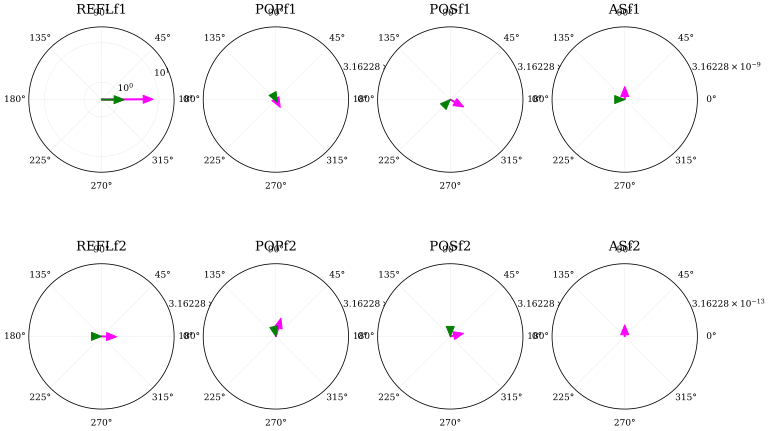

In [166]:
###### Computing the signal and plot ##########

# Specify subplot configuration
# This case is 2x4

ax = plt.subplots(2, 4, subplot_kw=dict(polar=True),figsize=[12, 8])[1].flatten()

color = ['magenta','green']
# Specify signal ports
ports = ['REFL','POP','POS','AS']

# Specify DoF to plot
DoF = ['PRCL','SRCL']

t = np.zeros([len(DoF),2*len(ports)])

############## Plotting Radar ##################

for jj in range(len(DoF)):
    
    # Run the model
    model,out = utl.run_fsig(DoF[jj], base)

    # Plott color setting for each DoF
    prop = dict(shrink=0, width=1, headwidth=8, headlength=10, connectionstyle='arc3',
         facecolor = color[jj], edgecolor = color[jj])
    
    # Deriving the mag and phase, plotting on a radar
    for ii in range(len(ax)):
        if ii < len(ports):
            r, demod = utl.demod_phase(out, ports[ii], '1', 0)
            ax[ii].set_title(ports[ii]+'f'+'1')
        else:
            r, demod = utl.demod_phase(out, ports[ii-4], '2', 0)
            ax[ii].set_title(ports[ii-4]+'f'+'2')
        
        t[jj,ii] = r
        ax[ii].annotate('', xy=(np.pi/180*demod,r), xytext=[0,0], arrowprops=prop, label='test')
        ax[ii].set_rscale('symlog')
        
        # Setting the plot range
        if jj == 0:
            ax[ii].set_ylim(0,0.1)
        else:
            if t[jj,ii] > t[jj-1,ii]:
                rang = np.round(np.log10(t[jj,ii]))
                ax[ii].set_ylim([0,10**(rang+0.5)])
            else:
                rang = np.round(np.log10(t[jj-1,ii]))
                ax[ii].set_ylim([0,10**(rang+0.5)])
        
    


# Be careful of polar log plots...

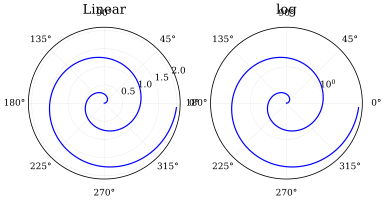

In [77]:
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r
ax = plt.subplots(1, 2, subplot_kw=dict(polar=True))[1].flatten()

ax[0].plot(theta, r)
ax[0].grid(True)
ax[0].set_title('Linear')
#plt.yscale('log')
#plt.yscale('symlog')

ax[1].plot(theta, r)
ax[1].set_title('log')
ax[1].set_yscale('symlog')

plt.show()

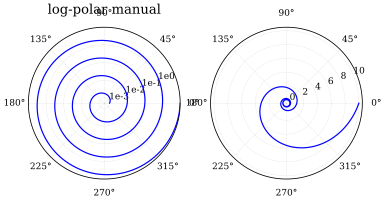

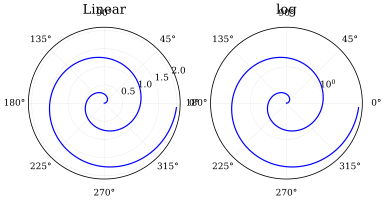

In [76]:
r = 10 ** np.arange(-3, 1.0, 0.0001) 
theta = 2 * np.pi * np.log10(r)

ax = plt.subplots(1, 2, subplot_kw=dict(polar=True))[1].flatten()

plot_logpolar(ax[0], theta, r)

ax[1]=plt.plot(theta,r)

plt.show()


r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r
ax = plt.subplots(1, 2, subplot_kw=dict(polar=True))[1].flatten()

ax[0].plot(theta, r)
ax[0].grid(True)
ax[0].set_title('Linear')
#plt.yscale('log')
#plt.yscale('symlog')

ax[1].plot(theta, r)
ax[1].set_title('log')
ax[1].set_yscale('symlog')

plt.show()

def plot_logpolar(ax, theta, r_, bullseye=None, **kwargs):
    min10 = np.log10(np.min(r_))
    max10 = np.log10(np.max(r_))
    if bullseye is None:
        bullseye = min10 - np.log10(0.5 * np.min(r_))
    r = np.log10(r_) - min10 + bullseye
    ax.plot(theta, r, **kwargs)
    l = np.arange(np.floor(min10), max10)
    ax.set_rticks(l - min10 + bullseye) 
    ax.set_yticklabels(["1e%d" % x for x in l])
    ax.set_rlim(0, max10 - min10 + bullseye)
    ax.set_title('log-polar manual')
    return ax

